# Sample applications


In the following, usage of pycombina for solving binary approximation problems is exemplified.


## Combinatorial integral approximation

A binary approximation problem for a sample data set shall be solved using combinatorial integral approximation. The setup includes ``n_c = 3`` mutually exclusive binary controls with each ``n_b = 149`` values.

The first column of the file ``sample_data.csv`` contains the time points, the other columns contain the relaxed binary values.

In [1]:
import numpy as np

data = np.loadtxt("sample_data.csv", skiprows = 1)

t = data[:,0]
b_rel = data[:-1,1:]

In the following, the data set is visualized.

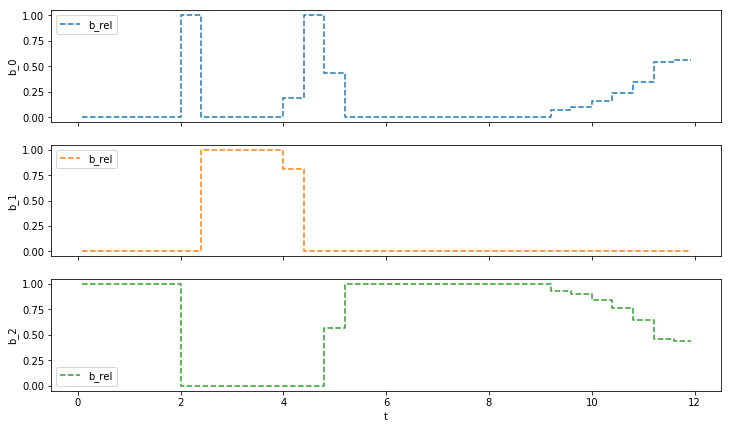

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

f, (ax1, ax2, ax3) = plt.subplots(3, sharex = True, figsize = (12,7))
ax1.step(t[:-1], b_rel[:,0], label = "b_rel", color = "C0", linestyle="dashed", where = "post")
ax1.set_ylabel("b_0")
ax1.legend(loc = "upper left")
ax2.step(t[:-1], b_rel[:,1], label = "b_rel",  color = "C1", linestyle="dashed", where = "post")
ax2.set_ylabel("b_1")
ax2.legend(loc = "upper left")
ax3.step(t[:-1], b_rel[:,2], label = "b_rel",  color = "C2", linestyle="dashed", where = "post")
ax3.set_ylabel("b_2")
ax3.legend(loc = "lower left")
ax3.set_xlabel("t")
plt.show()

First, we instantiate an object of the class ``pycombina.BinApprox`` to formulate the binary approximation problem, and check the problem dimensions.

In [3]:
from pycombina import BinApprox

binapprox = BinApprox(t, b_rel)

assert(binapprox.n_c == 3)
assert(binapprox.n_t == t.size-1)


-----------------------------------------------------------
|                                                         |
|                       pycombina                         |
|                                                         |
|     A collection of methods for binary approximation    |
|                                                         |
|       by A. Buerger, C. Zeile, S. Sager, M. Diehl       |
|                                                         |
-----------------------------------------------------------

- gurobipy not found, CombinaMILP disabled.



From the data shown above, it seem reasonable to set a maximum switching constraint for the controls.

In [4]:
binapprox.set_n_max_switches(n_max_switches = [5, 2, 3])

For solution of the problem, we choose combinatorial integral approximation using the Branch-and-Bound method in ``pycombina.CombinaBnB``.

In [5]:
from pycombina import CombinaBnB

combina = CombinaBnB(binapprox)
combina.solve()

-----------------------------------------------------------
                                                           
                 pycombina Branch and Bound                
                                                           
-----------------------------------------------------------
    Iteration |  Upper bound |  Branches  |  Runtime (s)   
-----------------------------------------------------------
 U         62 | 6.146028e+00 |        116 | 1.550000e-04
 U         64 | 6.066028e+00 |        116 | 2.680000e-04
 U         66 | 5.986028e+00 |        116 | 2.920000e-04
 U         68 | 5.906028e+00 |        116 | 3.100000e-04
 U         70 | 5.826028e+00 |        116 | 3.290000e-04
 U         72 | 5.746028e+00 |        116 | 3.500000e-04
 U         74 | 5.666028e+00 |        116 | 3.690000e-04
 U         76 | 5.586028e+00 |        116 | 3.860000e-04
 U         78 | 5.506028e+00 |        116 | 4.020000e-04
 U         80 | 5.426028e+00 |        116 | 4.190000e-04
----------

The solution times shown above have been achieved on an Intel Core i5-4570 3.20 GHz CPU.

In the following, we can retrieve and inspect the obtained binary solution and the corresponding objective value.

In [6]:
eta = binapprox.eta
b_bin = binapprox.b_bin

print("Objective value:", eta)

Objective value: 0.2168071999999996


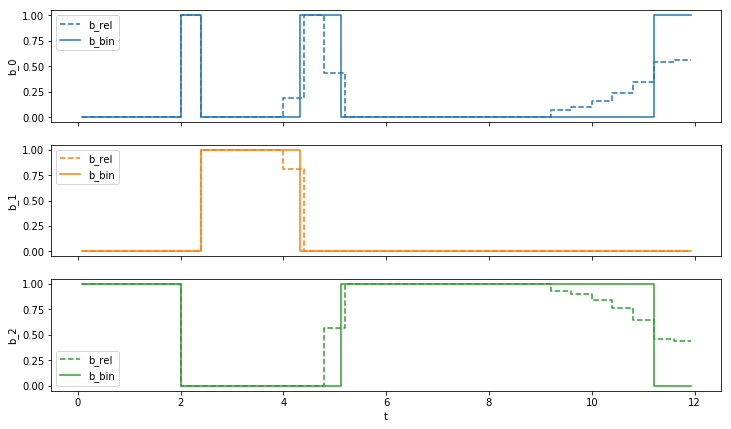

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex = True, figsize = (12,7))
ax1.step(t[:-1], b_rel[:,0], label = "b_rel", color = "C0", linestyle="dashed", where = "post")
ax1.step(t[:-1], b_bin[0,:], label = "b_bin", color = "C0", where = "post")
ax1.legend(loc = "upper left")
ax1.set_ylabel("b_0")
ax2.step(t[:-1], b_rel[:,1], label = "b_rel", color = "C1", linestyle="dashed", where = "post")
ax2.step(t[:-1], b_bin[1,:], label = "b_bin", color = "C1", where = "post")
ax2.legend(loc = "upper left")
ax2.set_ylabel("b_1")
ax3.step(t[:-1], b_rel[:,2], label = "b_rel", color = "C2", linestyle="dashed", where = "post")
ax3.step(t[:-1], b_bin[2,:], label = "b_bin", color = "C2", where = "post")
ax3.legend(loc = "lower left")
ax3.set_ylabel("b_2")
ax3.set_xlabel("t")
plt.show()

## Sum up rounding

... tbd